A medical insurance company has released data for almost 1,000 customers. The goal is to create a model that predicts the yearly medical cover cost. This data has been voluntarily provided by customers and is published on the Kaggle website for the practice of Machine Learning Models.

Data Exploration:

The dataset was explored to understand the distribution of feature variables and the target variable (yearly medical cover cost).
A correlation map was created to identify and rule out collinearity between features.
Outliers were identified and removed to improve model performance.
Model Implementation:

Several machine learning models were employed for the study, including Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest.
Among these models, the Random Forest model proved to be the best with an accuracy of 86%.
Key Features:

The features that played an important role in predicting the insurance premium included:
Age
BMI
AnyTransplants
AnyChronicDisease
NumberOfMajorSurgeries
HistoryOfCancerInFamily


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
# No missing data 
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [4]:
# Derive Variable BMI weight(kg)/(height(m))**2
df['BMI']=round(df['Weight']/(df['Height']*df['Height']*0.0001),2)

In [5]:
# Dropping the columns "Weight" and "Height"
df = df.drop(columns=['Weight', 'Height'])

In [6]:
# Change the order of columns
columns = df.columns.tolist()
new_order = columns[:1] + ['BMI'] + columns[1:-1]
df = df[new_order]

In [7]:
df.sample(2)

,Age,BMI,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
498,62,24.02,0,1,0,0,0,0,2,28000
615,59,29.40,1,0,0,0,0,0,0,29000


In [7]:
# Basic Statistics
df.describe()

,Age,BMI,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,27.460639,0.419878,0.468560,0.055781,0.180527,0.215010,0.117647,0.667343,24336.713996
std,13.963371,5.878789,0.493789,0.499264,0.229615,0.384821,0.411038,0.322353,0.749205,6248.184382
min,18.000000,15.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,23.395000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,27.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,30.760000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,40000.000000


### Performing EDA to see the distribution of data

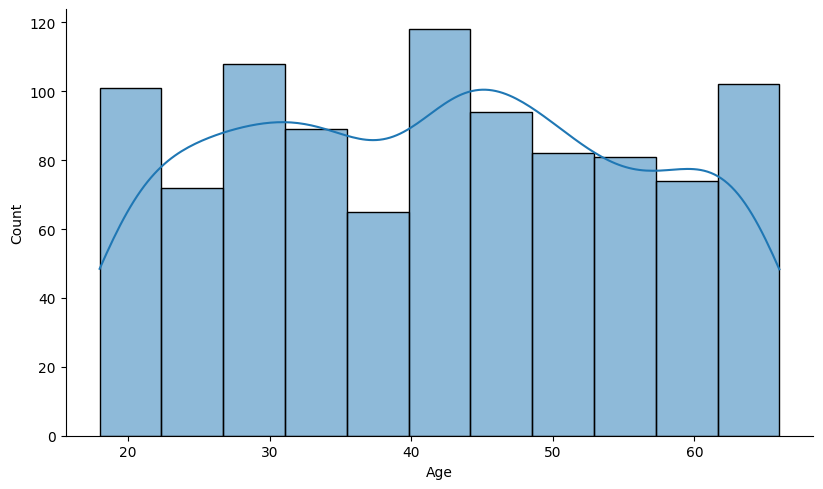

In [8]:
# Distribution of 'Age'
sns.displot(x='Age',data=df,aspect=10/6,kde=True)

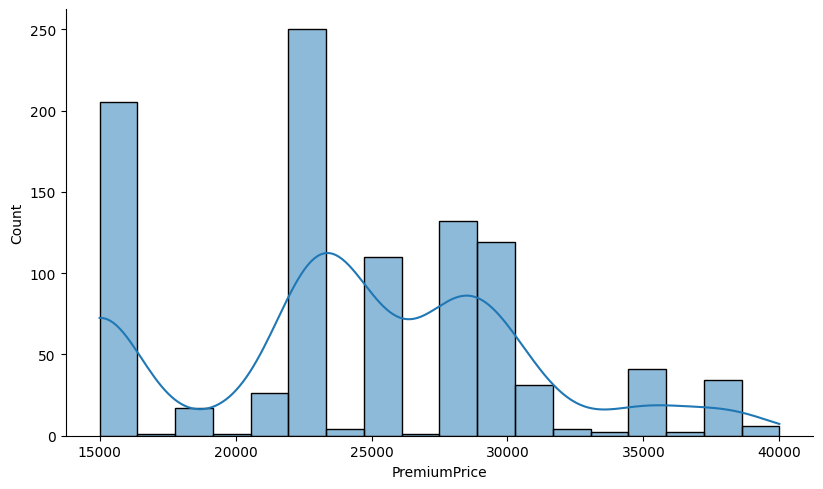

In [9]:
# Distribution of PremiumPrice
sns.displot(x='PremiumPrice',data=df,aspect=10/6,kde=True)

/var/folders/n_/qgby12m13kx31fdz6gsyp2rh0000gn/T/ipykernel_24127/268825757.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_premium = df.groupby('AgeGroup')['PremiumPrice'].mean().reset_index()


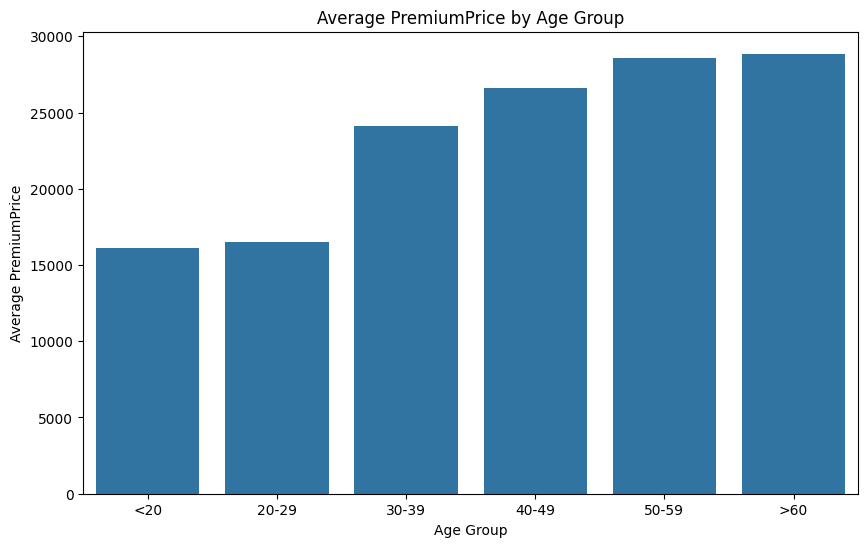

In [10]:
# Create bins as specified: <20, 20-29, 30-39,40-49,50-59, >60
bins = [-float('inf'), 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '>60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Aggregate PremiumPrice by AgeGroup
age_group_premium = df.groupby('AgeGroup')['PremiumPrice'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup', y='PremiumPrice', data=age_group_premium)
plt.title('Average PremiumPrice by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average PremiumPrice')
plt.show()

### It seems that increasing of age is associated with increasing PremiumPrice.

/var/folders/n_/qgby12m13kx31fdz6gsyp2rh0000gn/T/ipykernel_24127/3198535105.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_category_premium = df.groupby('BMICategory')['PremiumPrice'].mean().reset_index()


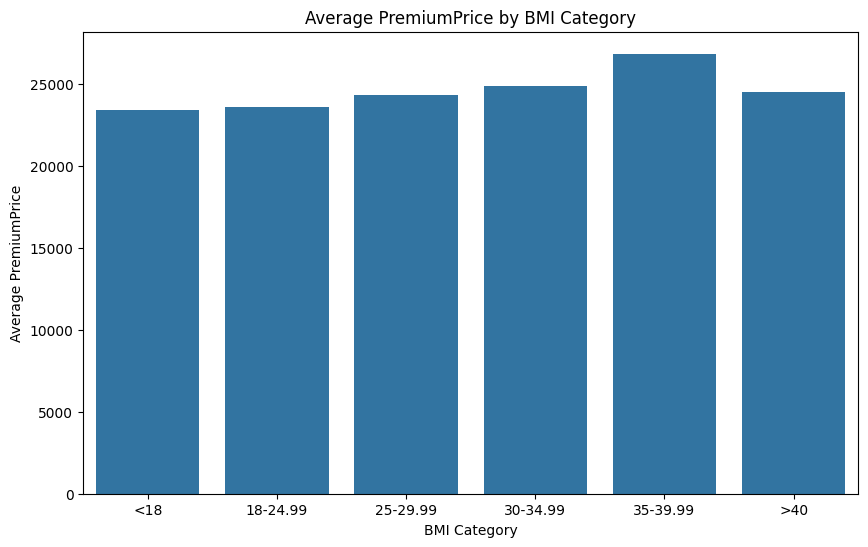

In [11]:
# Create bins for BMI: <18, 18-24.99, 25-29.99, 30-34.99, 35-39.99, >40
bmi_bins = [-float('inf'), 18, 24.99, 29.99, 34.99, 39.99, float('inf')]
bmi_labels = ['<18', '18-24.99', '25-29.99', '30-34.99', '35-39.99', '>40']
df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)
# Aggregate PremiumPrice by BMICategory
bmi_category_premium = df.groupby('BMICategory')['PremiumPrice'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10,6))
sns.barplot(x='BMICategory', y='PremiumPrice', data=bmi_category_premium)
plt.title('Average PremiumPrice by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average PremiumPrice')
plt.show()

### It seems that increasing of BMI are associated with increaing of PremiumPrice.

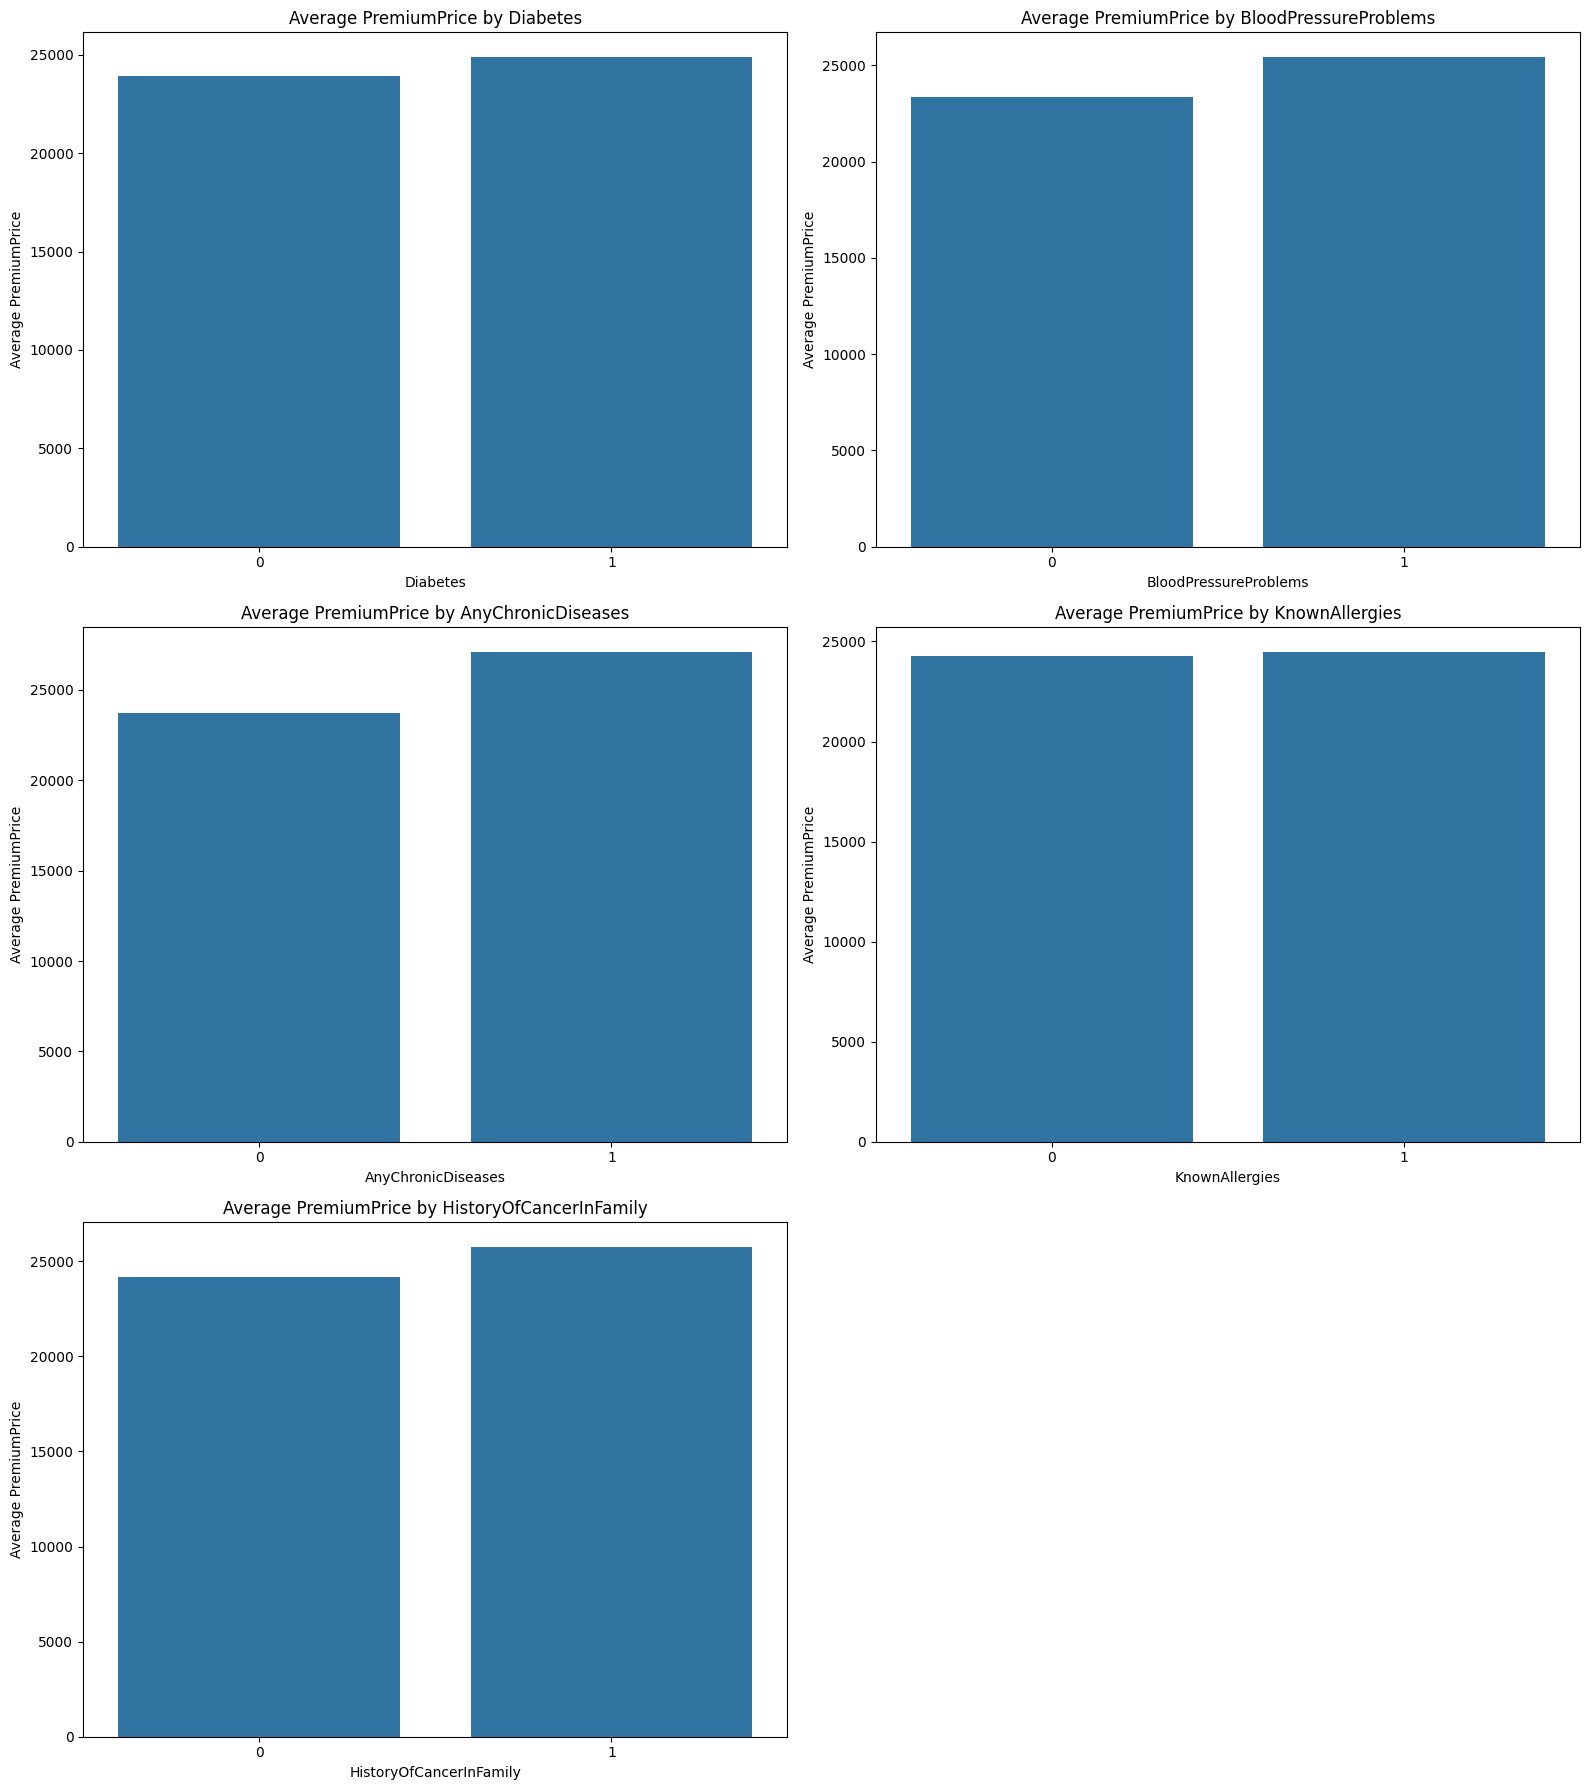

In [12]:
binary_columns = ['Diabetes', 'BloodPressureProblems', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

# Create a figure and axes to plot multiple plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
axes = axes.flatten()

for i, column in enumerate(binary_columns):
    # Aggregate PremiumPrice by the binary column
    column_premium = df.groupby(column)['PremiumPrice'].mean().reset_index()

    # Plot the data
    sns.barplot(x=column, y='PremiumPrice', data=column_premium, ax=axes[i])
    axes[i].set_title(f'Average PremiumPrice by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average PremiumPrice')

# Remove the last plot (if there are more plots than columns)
if len(binary_columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Having health issues will increase the PremiumPrice.

In [13]:
df['NumberOfMajorSurgeries'].value_counts()

NumberOfMajorSurgeries
0    479
1    372
2    119
3     16
Name: count, dtype: int64

In [14]:
df.sample()

,Age,BMI,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeGroup,BMICategory
582,50,22.79,0,0,0,0,0,0,1,29000,50-59,18-24.99


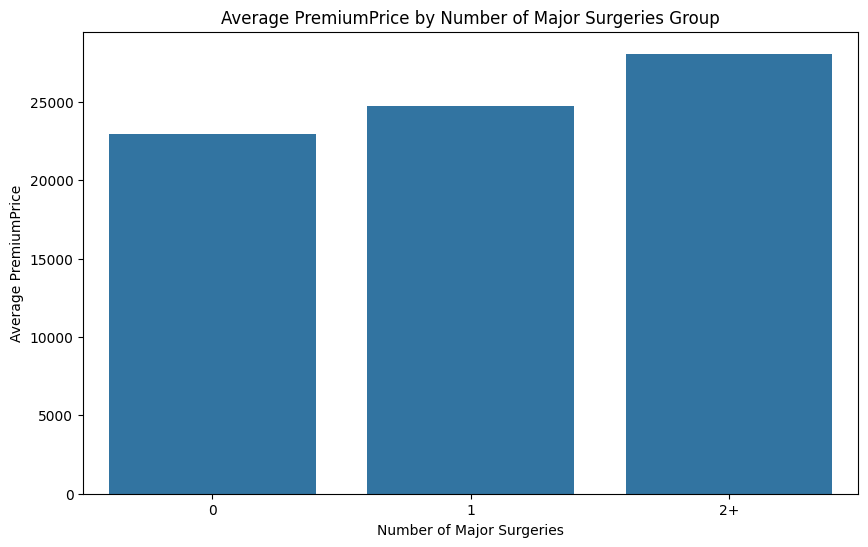

In [15]:
# Group values 2 and 3 together as '2+'
df['NumberOfMajorSurgeriesGroup'] = df['NumberOfMajorSurgeries'].replace({2: '2+', 3: '2+'})

# Aggregate PremiumPrice by NumberOfMajorSurgeriesGroup
surgery_group_premium = df.groupby('NumberOfMajorSurgeriesGroup')['PremiumPrice'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10,6))
sns.barplot(x='NumberOfMajorSurgeriesGroup', y='PremiumPrice', data=surgery_group_premium, order=['0', '1', '2+'])
plt.title('Average PremiumPrice by Number of Major Surgeries Group')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Average PremiumPrice')
plt.show()

In [16]:
#  Select columns from Column0 to Column8 (inclusive)
data = df.iloc[:, 0:9] 
data.head(2)

,Age,BMI,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,23.73,0,0,0,0,0,0,0
1,60,22.53,1,0,0,0,0,0,0


<Axes: >

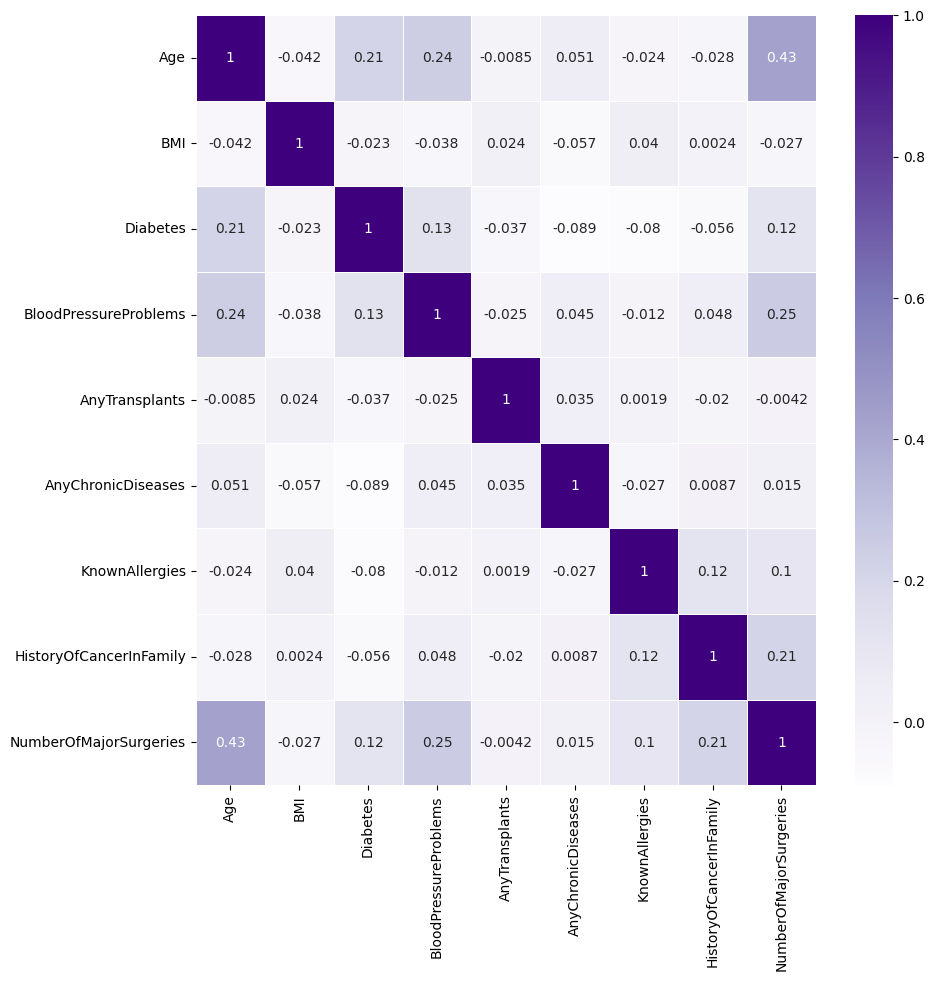

In [17]:
# Get the correlation map 
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True,linewidths=.5, cmap="Purples")

### There are no correlations between independant variables (<0.5)

# Preparing the Dataset for Modeling
## Targeted Variable PremiumPrice

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [29]:
df=df[['Age','BMI','Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries','PremiumPrice']]
df.head(2)

,Age,BMI,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,23.73,0,0,0,0,0,0,0,25000
1,60,22.53,1,0,0,0,0,0,0,29000


In [106]:
X = df.drop(columns=["PremiumPrice"],axis=1)
Y=df["PremiumPrice"]

In [31]:
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print(Y_train.shape)

(788, 9)
(198, 9)


In [69]:
# removing outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [71]:
df.head(2)

,Age,BMI,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,23.73,0,0,0,0,0,0,0,25000
1,60,22.53,1,0,0,0,0,0,0,29000


In [73]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(Y_train.shape)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

(788, 9)
(788,)


In [74]:
# pip install lightgbm --trusted-host pypi.org --trusted-host files.pythonhosted.org

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
predictions1 = logreg.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(Y_test, predictions1))
print('\n')
print(classification_report(Y_test, predictions1))

Confusion Matrix: 
 [[41  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  0  0 41  1  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  4 12  0  0  1  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  1  0  0 12  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  1  4  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  4  0  2  0  3  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  7]]


              precision    recall  f1-score   support

    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [76]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(Y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)


Accuracy of the Logistic Regression Model is:  0.7676767676767676


In [77]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

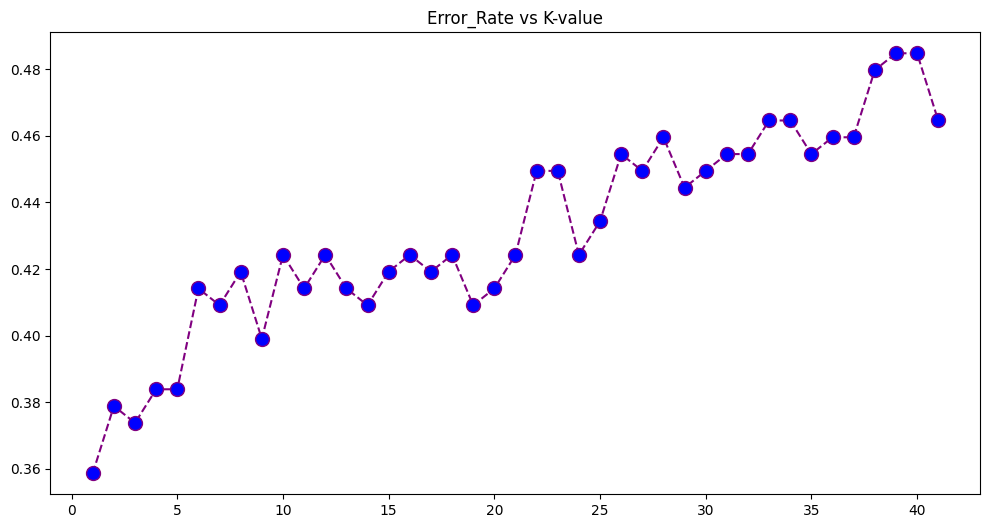

In [78]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [79]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
predictions2 = knn.predict(X_test)

In [42]:
print(confusion_matrix(Y_test, predictions2))
print("\n")
print(classification_report(Y_test, predictions2))

[[36  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 2  0  0  0  0  0 41  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  7  5  0  0  4  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  5  0 14  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  9  3  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  3  0  0  0  5  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  4  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  2  0  0  1  1  2  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8]]


              precision    recall  f1-score   support

       15000       0.80 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [80]:
knn_model_acc = accuracy_score(Y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.601010101010101


In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, Y_train)
predictions4 = rfc.predict(X_test)

In [82]:
print("Confusion Matrix: \n", confusion_matrix(Y_test, predictions4))
print("\n")
print(classification_report(Y_test, predictions4))

Confusion Matrix: 
 [[42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0 41  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0 12  0  0  0  4  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  3  0  0  0 13  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  1  5  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [83]:
rfc_acc = accuracy_score(Y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.797979797979798


In [84]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, Y_train)
predictions5 = svc_model.predict(X_test)

In [85]:
print("Confusion Matrix: \n", confusion_matrix(Y_test, predictions5))
print("\n")
print(classification_report(Y_test, predictions5))

Confusion Matrix: 
 [[41  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0 41  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  3 10  0  0  3  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  3  1  0  0 13  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  3  2  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  2  2  2  0  2  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]]


              precision    recall  f1-score   support

    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [86]:
svm_acc = accuracy_score(Y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.7424242424242424


/var/folders/n_/qgby12m13kx31fdz6gsyp2rh0000gn/T/ipykernel_24127/3948636763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= model_acc, y=model_name, palette='magma')


<Axes: >

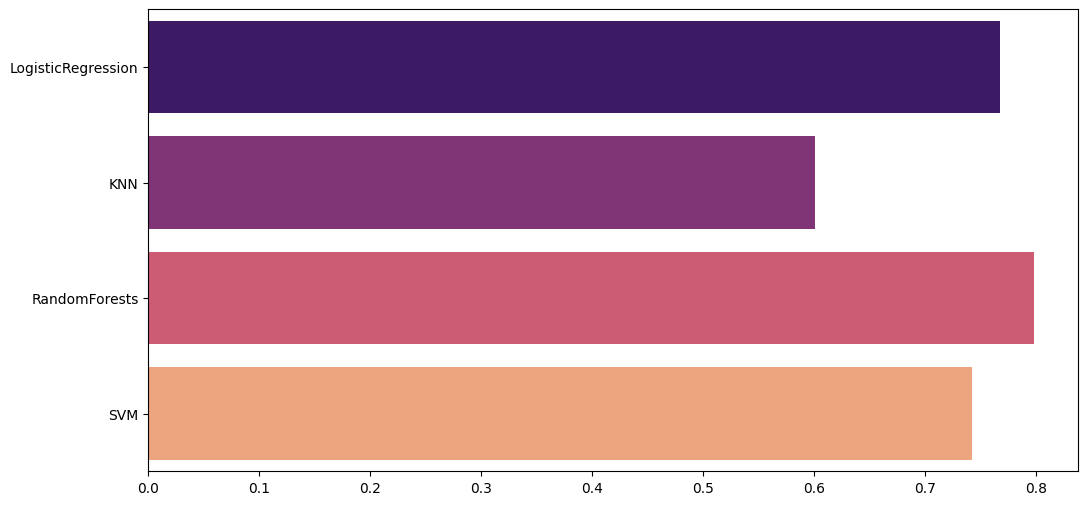

In [87]:
plt.figure(figsize=(12,6))
model_acc = [logreg_acc, knn_model_acc, rfc_acc, svm_acc]
model_name = ['LogisticRegression', 'KNN', 'RandomForests', 'SVM']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [101]:
models = { LogisticRegression():'Logistic Regression',KNeighborsClassifier(): 'KNN', RandomForestRegressor():'Random Forest'}

# fitting data for each model
for m in models.keys():
    m.fit(X_train, Y_train)
    
# printing accuracy score for each model
for model, name in models.items():
    score = model.score(X_test, Y_test)*100
    print(f"{name} accuracy: ", score, "%")

Logistic Regression accuracy:  76.76767676767676 %
KNN accuracy:  61.61616161616161 %
Random Forest accuracy:  86.21784185365433 %


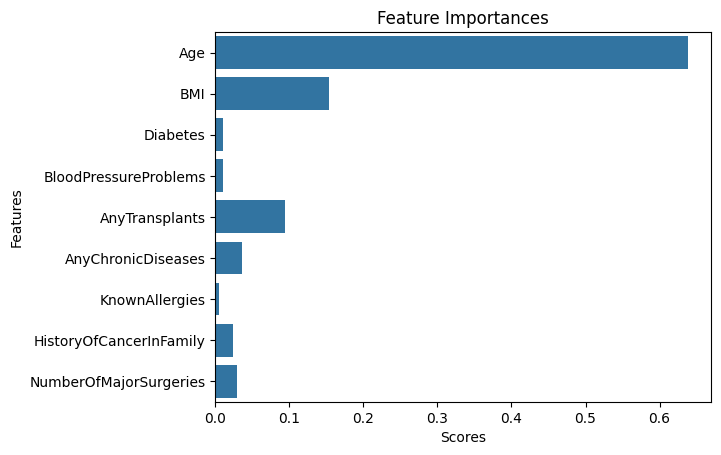

In [108]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, Y_train)
rf_feat_import = rand_forest.feature_importances_

# graphing feature importances
sns.barplot(x=rf_feat_import, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

In [61]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,Y_train)
feature_imp1 = random_forest.feature_importances_

sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

AttributeError: 'DataFrame' object has no attribute 'df'

In [57]:
print(X)

[[45.   23.73  0.   ...  0.    0.    0.  ]
 [60.   22.53  1.   ...  0.    0.    0.  ]
 [36.   23.63  1.   ...  0.    0.    1.  ]
 ...
 [56.   29.55  0.   ...  0.    0.    1.  ]
 [47.   29.24  1.   ...  1.    0.    1.  ]
 [21.   30.04  0.   ...  1.    0.    1.  ]]


In [58]:
type(X)

numpy.ndarray